<a href="https://colab.research.google.com/github/inderaihsan/fraud_detection/blob/main/Fraud_Detection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('Fraud_Data.csv')
df.head() 

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [3]:
df.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


# One hot encoding manually to acquire numerical feature

In [7]:
#source	browser	sex	age	  
source = np.unique(df['source']) 
for x in source : 
  df['is_ '+x] = df['source'].apply(lambda y:1 if y==x else 0)

In [11]:
def transform(x) : 
  source = np.unique(df[x]) 
  for j in source : 
    df['is_ '+j] = df[x].apply(lambda y:1 if y==j else 0) 
transform('sex') 
transform('browser') 

In [12]:
df.head() 

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,is_ Ads,is_ Direct,is_ SEO,is_ F,is_ M,is_ Chrome,is_ FireFox,is_ IE,is_ Opera,is_ Safari
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,0,0,1,0,1,1,0,0,0,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1,0,0,1,0,1,0,0,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0,0,1,0,1,0,0,0,1,0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,0,0,1,0,1,0,0,0,0,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1,0,0,0,1,0,0,0,0,1


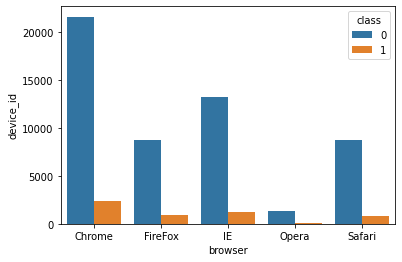

In [ ]:
v = df.groupby(by=['browser', 'class']).count().reset_index()
sns.barplot(x='browser', y='device_id', hue='class', data=v) 

In [ ]:
X=df[[]]

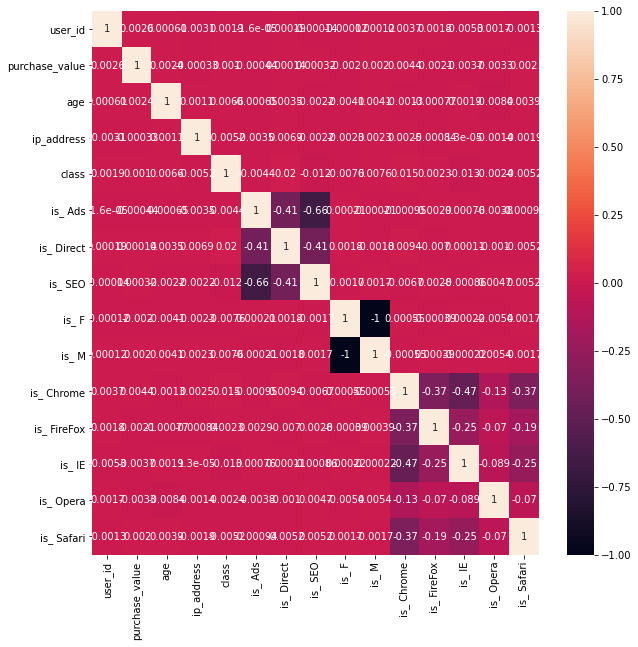

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


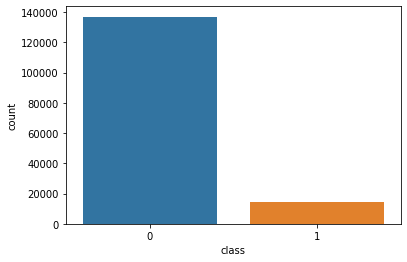

In [24]:
sns.countplot(df['class']) 

In [19]:
clf = LogisticRegression() 
X = df[['is_ Ads', 'is_ Direct', 'is_ SEO', 'is_ F', 'is_ M', 'is_ Chrome',
       'is_ FireFox', 'is_ IE', 'is_ Opera', 'is_ Safari']] 
y = df['class']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
clf = clf.fit(X_train , y_train)  
res = clf.predict(X_test) 
from sklearn.metrics import classification_report 
print(classification_report(y_test, res))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     41117
           1       0.00      0.00      0.00      4217

    accuracy                           0.91     45334
   macro avg       0.45      0.50      0.48     45334
weighted avg       0.82      0.91      0.86     45334



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#relative error costs from 1:1 to 1:30,

In [33]:
# Separate majority and minority classes
df_majority = df[df['class']==0]
df_minority = df[df['class']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=136961,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['class'].value_counts()


1    136961
0    136961
Name: class, dtype: int64

In [35]:
X = df_upsampled['']

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,is_ Ads,is_ Direct,is_ SEO,is_ F,is_ M,is_ Chrome,is_ FireFox,is_ IE,is_ Opera,is_ Safari
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,0,0,1,0,1,1,0,0,0,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1,0,0,1,0,1,0,0,0,0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,0,0,1,0,1,0,0,0,0,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1,0,0,0,1,0,0,0,0,1
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17852,360662,2015-01-06 18:44:58,2015-01-06 18:44:59,41,LLORICSMLDKLB,SEO,FireFox,F,34,4.253075e+09,1,0,0,1,1,0,0,1,0,0,0
111494,352155,2015-02-11 12:19:19,2015-03-01 10:48:16,33,MBYXCGDQVPSKN,Direct,IE,F,34,8.266661e+08,1,0,1,0,1,0,0,0,1,0,0
90726,137107,2015-01-09 12:48:22,2015-01-09 12:48:23,45,VEQOQPGGZUCWY,Direct,Chrome,F,27,3.224982e+09,1,0,1,0,1,0,1,0,0,0,0
65144,339509,2015-01-11 03:12:06,2015-05-01 11:56:17,42,QHKDQRGNUJUJL,Direct,Chrome,M,48,6.509850e+07,1,0,1,0,0,1,1,0,0,0,0


In [41]:
feat = ['is_ Ads', 'is_ Direct', 'is_ SEO', 'is_ F', 'is_ M', 'is_ Chrome',
       'is_ FireFox', 'is_ IE', 'is_ Opera', 'is_ Safari'] 
X = df_upsampled[feat] 
y = df_upsampled['class'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
clf1 = LogisticRegression().fit(X_train, y_train)
res = clf1.predict(X_test)

In [42]:
print(classification_report(res, y_test))

              precision    recall  f1-score   support

           0       0.51      0.52      0.51     26810
           1       0.53      0.52      0.52     27975

    accuracy                           0.52     54785
   macro avg       0.52      0.52      0.52     54785
weighted avg       0.52      0.52      0.52     54785



In [44]:
feat = ['is_ Ads', 'is_ Direct', 'is_ SEO', 'is_ F', 'is_ M', 'is_ Chrome',
       'is_ FireFox', 'is_ IE', 'is_ Opera', 'is_ Safari'] 
X = df_upsampled[feat] 
y = df_upsampled['class'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
clf1 = DecisionTreeClassifier().fit(X_train, y_train)
res = clf1.predict(X_test)
print(classification_report(res , y_test))

              precision    recall  f1-score   support

           0       0.46      0.53      0.49     23545
           1       0.60      0.53      0.56     31240

    accuracy                           0.53     54785
   macro avg       0.53      0.53      0.53     54785
weighted avg       0.54      0.53      0.53     54785



In [45]:
clf1.feature_importances_

array([0.02746316, 0.2159206 , 0.        , 0.08728112, 0.14517975,
       0.17542744, 0.05226229, 0.1445025 , 0.02600019, 0.12596296])

In [46]:
feat

['is_ Ads',
 'is_ Direct',
 'is_ SEO',
 'is_ F',
 'is_ M',
 'is_ Chrome',
 'is_ FireFox',
 'is_ IE',
 'is_ Opera',
 'is_ Safari']